In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('spotify_history.csv')

data.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [4]:
data.isna().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [5]:
data.drop(['spotify_track_uri','reason_start','reason_end'],axis=1,inplace=True)
data.head()

,ts,platform,ms_played,track_name,artist_name,album_name,shuffle,skipped
0,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,False,False
1,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,False,False
2,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,False,False
3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,False,False
4,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,False,False


In [6]:
def change_to_date(column):
    data[column] = pd.to_datetime(data[column],infer_datetime_format=True)

In [7]:
for i in ['ts']:
    change_to_date(i)

In [8]:
data['date']= data['ts'].dt.day
data['month']= data['ts'].dt.month
data['year']= data['ts'].dt.year
data['hour']= data['ts'].dt.hour
data['minute']= data['ts'].dt.minute
data['second']= data['ts'].dt.second

In [9]:
data.drop(['ts'],axis=1,inplace=True)
data.head()

,platform,ms_played,track_name,artist_name,album_name,shuffle,skipped,date,month,year,hour,minute,second
0,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,False,False,8,7,2013,2,44,34
1,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,False,False,8,7,2013,2,45,37
2,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,False,False,8,7,2013,2,50,24
3,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,False,False,8,7,2013,2,52,40
4,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,False,False,8,7,2013,3,17,52


In [10]:
print(data['platform'].nunique())
print(data['track_name'].nunique())
print(data['artist_name'].nunique())
print(data['album_name'].nunique())

6
13839
4113
7948


In [11]:
import re
def clean_text(track_name):
    track_name = track_name.lower()
    track_name = re.sub(r'[^\w\s]','',track_name)
    track_name = re.sub(r'\d+','',track_name)
    return track_name

In [12]:
data['track_name'] = data['track_name'].apply(clean_text)
data[['track_name']]

,track_name
0,say it just say it
1,drinking from the bottle feat tinie tempah
2,born to die
3,off to the races
4,half mast
...,...
149855,on the way home
149856,magical mystery tour remastered
149857,stop this train live at the nokia theatre los...
149858,i dont trust myself with loving you


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words='english')

In [14]:
vector.fit_transform(data['track_name'])

<149860x10073 sparse matrix of type '<class 'numpy.int64'>'
	with 360878 stored elements in Compressed Sparse Row format>

In [15]:
data[['track_name']]

,track_name
0,say it just say it
1,drinking from the bottle feat tinie tempah
2,born to die
3,off to the races
4,half mast
...,...
149855,on the way home
149856,magical mystery tour remastered
149857,stop this train live at the nokia theatre los...
149858,i dont trust myself with loving you


In [16]:
import re
def clean_text(artist_name):
    artist_name = artist_name.lower()
    artist_name = re.sub(r'[^\w\s]','',artist_name)
    artist_name = re.sub(r'\d+','',artist_name)
    return artist_name


data['artist_name'] = data['artist_name'].apply(clean_text)
data[['artist_name']]


,artist_name
0,the mowglis
1,calvin harris
2,lana del rey
3,lana del rey
4,empire of the sun
...,...
149855,john mayer
149856,the beatles
149857,john mayer
149858,john mayer


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words='english')
vector.fit_transform(data['artist_name'])
data[['artist_name']]

,artist_name
0,the mowglis
1,calvin harris
2,lana del rey
3,lana del rey
4,empire of the sun
...,...
149855,john mayer
149856,the beatles
149857,john mayer
149858,john mayer


In [18]:
import re
def clean_text(album_name):
    album_name = album_name.lower()
    album_name = re.sub(r'[^\w\s]','',album_name)
    album_name = re.sub(r'\d+','',album_name)
    return album_name


data['album_name'] = data['album_name'].apply(clean_text)
data[['album_name']]

,album_name
0,waiting for the dawn
1,months
2,born to die the paradise edition
3,born to die the paradise edition
4,walking on a dream
...,...
149855,paradise valley
149856,magical mystery tour
149857,where the light is john mayer live in los angeles
149858,continuum


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words='english')
vector.fit_transform(data['album_name'])
data[['album_name']]

,album_name
0,waiting for the dawn
1,months
2,born to die the paradise edition
3,born to die the paradise edition
4,walking on a dream
...,...
149855,paradise valley
149856,magical mystery tour
149857,where the light is john mayer live in los angeles
149858,continuum


In [20]:
data.head()

,platform,ms_played,track_name,artist_name,album_name,shuffle,skipped,date,month,year,hour,minute,second
0,web player,3185,say it just say it,the mowglis,waiting for the dawn,False,False,8,7,2013,2,44,34
1,web player,61865,drinking from the bottle feat tinie tempah,calvin harris,months,False,False,8,7,2013,2,45,37
2,web player,285386,born to die,lana del rey,born to die the paradise edition,False,False,8,7,2013,2,50,24
3,web player,134022,off to the races,lana del rey,born to die the paradise edition,False,False,8,7,2013,2,52,40
4,web player,0,half mast,empire of the sun,walking on a dream,False,False,8,7,2013,3,17,52


In [21]:
print(data['track_name'].nunique())
print(data['artist_name'].nunique())
print(data['album_name'].nunique())

13561
4110
7821


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
cat = data.select_dtypes(include=['object']).columns

In [24]:
cat

Index(['platform', 'track_name', 'artist_name', 'album_name'], dtype='object')

In [25]:
num = data.select_dtypes(include=['float64','int64','bool']).columns

In [26]:
num

Index(['ms_played', 'shuffle', 'skipped'], dtype='object')

In [27]:
label_encoders = {}
for col in cat:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [28]:
label_encoders

{'platform': LabelEncoder(),
 'track_name': LabelEncoder(),
 'artist_name': LabelEncoder(),
 'album_name': LabelEncoder()}

In [29]:
data

,platform,ms_played,track_name,artist_name,album_name,shuffle,skipped,date,month,year,hour,minute,second
0,4,3185,9767,3651,7418,False,False,8,7,2013,2,44,34
1,4,61865,2963,572,56,False,False,8,7,2013,2,45,37
2,4,285386,1427,2076,924,False,False,8,7,2013,2,50,24
3,4,134022,8267,2076,924,False,False,8,7,2013,2,52,40
4,4,0,4433,1113,7430,False,False,8,7,2013,3,17,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149855,0,1247,8358,1780,4885,True,True,15,12,2024,23,6,19
149856,0,1515,7081,3507,4032,True,True,15,12,2024,23,6,21
149857,0,1283,10674,1780,7552,True,True,15,12,2024,23,6,22
149858,0,1306,5121,1780,1388,True,True,15,12,2024,23,6,23


In [30]:
label_encoders = {}
for col in num:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [31]:
data

,platform,ms_played,track_name,artist_name,album_name,shuffle,skipped,date,month,year,hour,minute,second
0,4,3144,9767,3651,7418,0,0,8,7,2013,2,44,34
1,4,17951,2963,572,56,0,0,8,7,2013,2,45,37
2,4,40199,1427,2076,924,0,0,8,7,2013,2,50,24
3,4,25314,8267,2076,924,0,0,8,7,2013,2,52,40
4,4,0,4433,1113,7430,0,0,8,7,2013,3,17,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149855,0,1209,8358,1780,4885,1,1,15,12,2024,23,6,19
149856,0,1477,7081,3507,4032,1,1,15,12,2024,23,6,21
149857,0,1245,10674,1780,7552,1,1,15,12,2024,23,6,22
149858,0,1268,5121,1780,1388,1,1,15,12,2024,23,6,23


In [32]:
data.dtypes

platform       int32
ms_played      int64
track_name     int32
artist_name    int32
album_name     int32
shuffle        int64
skipped        int64
date           int32
month          int32
year           int32
hour           int32
minute         int32
second         int32
dtype: object

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [34]:
data[['ms_played','track_name','album_name','artist_name']] = sc.fit_transform(data[['ms_played','track_name','album_name','artist_name']])

In [35]:
num = num.drop('skipped')

In [36]:
num

Index(['ms_played', 'shuffle'], dtype='object')

In [37]:
data

,platform,ms_played,track_name,artist_name,album_name,shuffle,skipped,date,month,year,hour,minute,second
0,4,-1.181617,0.739486,1.128145,1.466026,0,0,8,7,2013,2,44,34
1,4,-0.208893,-0.995660,-1.438417,-1.641824,0,0,8,7,2013,2,45,37
2,4,1.252656,-1.387369,-0.184728,-1.275400,0,0,8,7,2013,2,50,24
3,4,0.274808,0.356958,-0.184728,-1.275400,0,0,8,7,2013,2,52,40
4,4,-1.388157,-0.620783,-0.987456,1.471091,0,0,8,7,2013,3,17,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149855,0,-1.308733,0.380164,-0.431464,0.396726,1,1,15,12,2024,23,6,19
149856,0,-1.291128,0.054506,1.008111,0.036634,1,1,15,12,2024,23,6,21
149857,0,-1.306368,0.970787,-0.431464,1.522593,1,1,15,12,2024,23,6,22
149858,0,-1.304858,-0.445330,-0.431464,-1.079523,1,1,15,12,2024,23,6,23


In [38]:
import seaborn as sns

<Axes: >

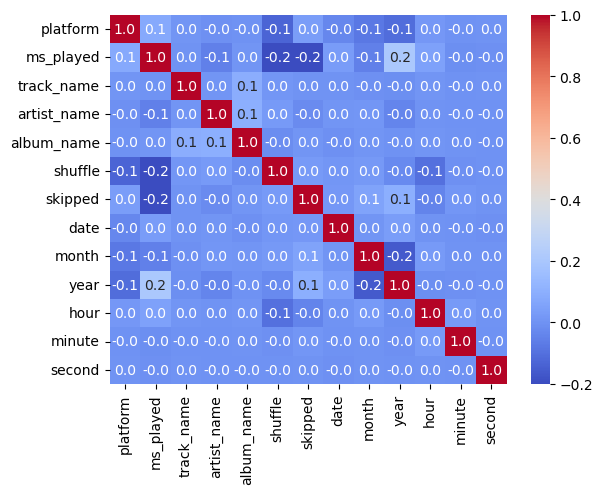

In [39]:
sns.heatmap(data.corr(),annot=True,fmt='.1f',cmap='coolwarm')

In [40]:
X_c = data.drop('skipped',axis=1)
y_c = data['skipped']
X_r = data.drop('artist_name',axis=1)
y_r =data['artist_name']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_c_train,X_c_test,y_c_train,y_c_test = train_test_split(X_c,y_c,test_size=0.2)
X_r_train,X_r_test,y_r_train,y_r_test = train_test_split(X_r,y_r,test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [44]:
RFC = RandomForestClassifier(n_estimators=100)
RFR = RandomForestRegressor(n_estimators=100)

In [46]:
from sklearn.model_selection import GridSearchCV
# Base model
RFC = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit to training data
grid_search.fit(X_c_train, y_c_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.9889146542287361


In [47]:
RFC = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 200)
RFC.fit(X_c_train,y_c_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [49]:
y_pred = RFC.predict(X_c_test)

In [50]:
pred = RFC.predict(X_c_train)

In [52]:
conf = confusion_matrix(y_c_test,y_pred)

conf

array([[28293,   101],
       [  228,  1350]], dtype=int64)

In [53]:
accuracy_score(y_c_test,y_pred)

0.989023088215668

In [54]:
accuracy_score(y_c_train,pred)

0.9957293473908981

In [56]:
data['skipped'].value_counts()

skipped
0    141991
1      7869
Name: count, dtype: int64

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
RFR = RandomForestRegressor(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 200)

RFR.fit(X_r_train,y_r_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)

In [59]:
y_pred = RFR.predict(X_r_test)

In [60]:
pred = RFR.predict(X_r_train)

In [61]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [63]:
r2_score(y_r_test,y_pred)

0.8972288934225741

In [64]:
r2_score(y_r_train,pred)

0.939504238404125

In [65]:
mean_absolute_error(y_r_test,y_pred)

0.12310338233035141

In [66]:
mean_squared_error(y_r_test,y_pred)

0.10260246418536735

In [68]:
import pickle
with open("spotify_model.pkl", "wb") as file:
    pickle.dump(RFC, file)

print("✅ Model saved!")

✅ Model saved!
